### Univariate Linear Regression  
    Linear regression builds a model which establishes a relationship between features and targets
    Here the feature was house size and the target was house price.
    for simple linear regression, the model has two parameters w and b whose values are 'fit' using training data.
    once a model's parameters have been determined, the model can be used to make predictions on novel data.
    
     Cost function helps us to find out the good parameters w and b
     
     Cost function J(w, b) = sum(all training examples loss function)(for batch)
              
                          J(w, b) = 1/2m Σ (f(xi) - yi)**2 where i tends from 0 to m 
              
              f(Xi) is the mathematical representation of our regression model = w. x + b
              (m - training examples, n- features)
     
     Objective = Find the best parameters that minimizes the cost J
     
     How? Using descent of gradients - gradient descent 
     
     graph =        |\      /
             J(w, b)| \    /./|slope of curve will be calculated
                    |  \__/ /_| 
                    |__________
                        w or b
       . is any point on the curve i.e randomly selected particular w's cost
       Next we draw a tanget from the point and then extends the remaining lines to form a traingle.
       Intention is : we are trying to find the slope of the curve in order to move the cost along the desecending slope
       Slope is nothing but dj/dw (differntiation) = gradient
       we need to find the parameters(w,b)  by updating these params for every iteration inorder to descent our gradient.
       This is done until the cost J is reached the global minima
       Gradients
                       dj_dwj = 1/m Σ (f(xi) - yi).xij where i tends from 0 to m , j tends from 0 to n
                       dj_db = 1/m Σ (f(xi) - yi)  where i tends from 0 to m 
                       
               Params update rule : Gradient descent algorithm procedure:
                    
                    wj = wj - alpha * dj/dwj (j tends from 0 to n)
                    b = b - alpha * db/db
                    
              alpha is the learning rate which controls the step of gradient descent for every iteration
              dj/dw and dj/db controls in which direction that gradient across the curve has to move
       
       if dj/dw is postive, the the gradient moves in the direction where w is decreasing since w-postivenumber => decreasing w
       if dj/dw is negative, the the gradient moves in the direction where w is increasing since w-(-num)= w+num => increasin w
       
       the gradient i.e slope will be reduced when reaching nearer to the global minima.
       
       when alpha is high, the global minima will be overshot
       when alpha is low, the learning wil be slow
       
       Fitting the model is nothing fitting the model to the training set inorder to find the best parameters(via gradient descent) for the model which results in low cost. basically fitting our predictions(can be seen in graph) from our model to the true  labels of unknown true model.
              
              

In [19]:
#Univariate Linear Regression for determining housing price as per sqft
import numpy as np
import matplotlib.pyplot as plt
#E:\Learning\ML\Learning Practice\Code\ML Specialization Coursera
plt.style.use("./deeplearning.mplstyle") #custom style

x_train = [1. 2.]
y_train = [300. 500.]
x_train.shape: (2,)
Number of training examples is: 2


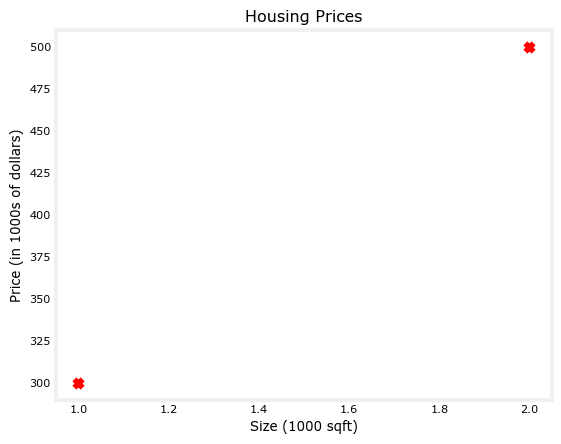

In [4]:
x_train = np.array([1.0, 2.0]) 
#sqft in 1000's => 1.0 represents 1000sqft

y_train = np.array([300.0, 500.0]) 
#dollars in 1000$ => 300.0 represent 300,000 dollars -  units of price are 1000s of dollars.

#descriptive stats
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")
print(f"x_train.shape: {x_train.shape}")

m = x_train.shape[0] #m = len(x_train) also gives the same
print(f"Number of training examples is: {m}")


#plotting
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices")
plt.xlabel("Size (1000 sqft)")
plt.ylabel("Price (in 1000s of dollars)")
plt.show()

w: 100
b: 100


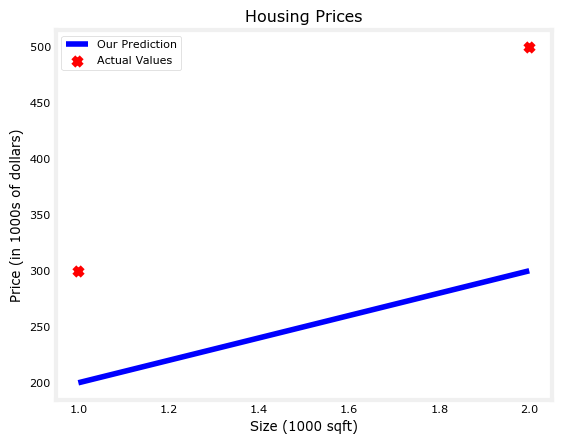

In [7]:
#Trying different params values for the params w, b to fit the model f to our training data set
#f_wb = w.x + b regression univariate model

#lets try w=100 and b=100
w, b = 100, 100
print(f"w: {w}")
print(f"b: {b}")

def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
     x (ndarray, (m,)): Data, m examples
     w, b (scalar)    : model parameters
    Returns
     y (ndarray, (m,)): target values
    
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    
    return f_wb
    
tmp_f_wb = compute_model_output(x_train, w, b,)

#plotting
plt.plot(x_train, tmp_f_wb, c='b', label="Our Prediction") #our model prediction
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values') #actual training data
plt.title("Housing Prices")
plt.xlabel("Size (1000 sqft)")
plt.ylabel("Price (in 1000s of dollars)")
plt.legend()
plt.show()

#Observation:
#Setting w=100 and b=100 does not result in a line that fits our data which are red cross marks. Hence we need to try new params of w and b

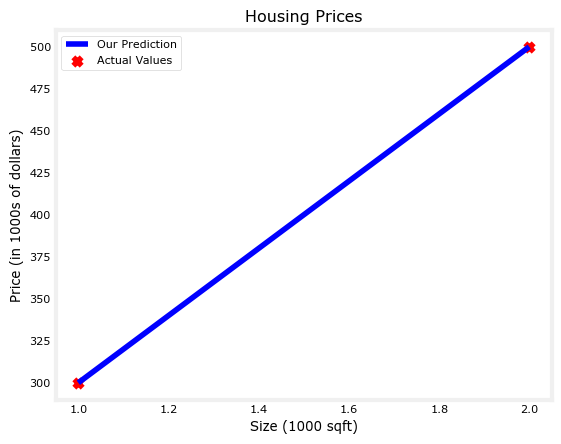

In [8]:
#lets try w=200 and b=100
w = 200
b = 100

tmp_f_wb = compute_model_output(x_train, w, b,)

#plotting
plt.plot(x_train, tmp_f_wb, c='b', label="Our Prediction") #our model prediction
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values') #actual training data
plt.title("Housing Prices")
plt.xlabel("Size (1000 sqft)")
plt.ylabel("Price (in 1000s of dollars)")
plt.legend()
plt.show()

In [11]:
#make prediction for new trianing example for params w=200 and b=100
w = 200
b = 100
x_test = 1.2 #1200 sqft
cost_1200sqft = w * x_test + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


In [12]:
w_range = np.array([200-200,200+200])
w_range

array([  0, 400])

In [16]:
w_array = np.arange(*w_range, 5)

0 400


### Cost Function

In [25]:
#!pip install ipympl

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

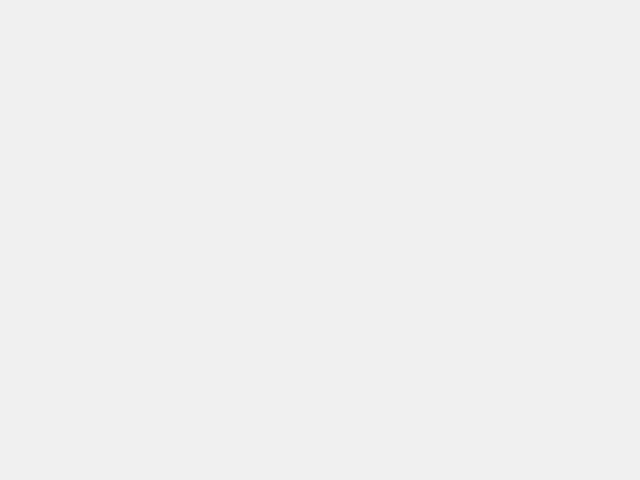

In [50]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
%run ./lab_utils_uni.py
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost


plt_intuition(x_train, y_train)

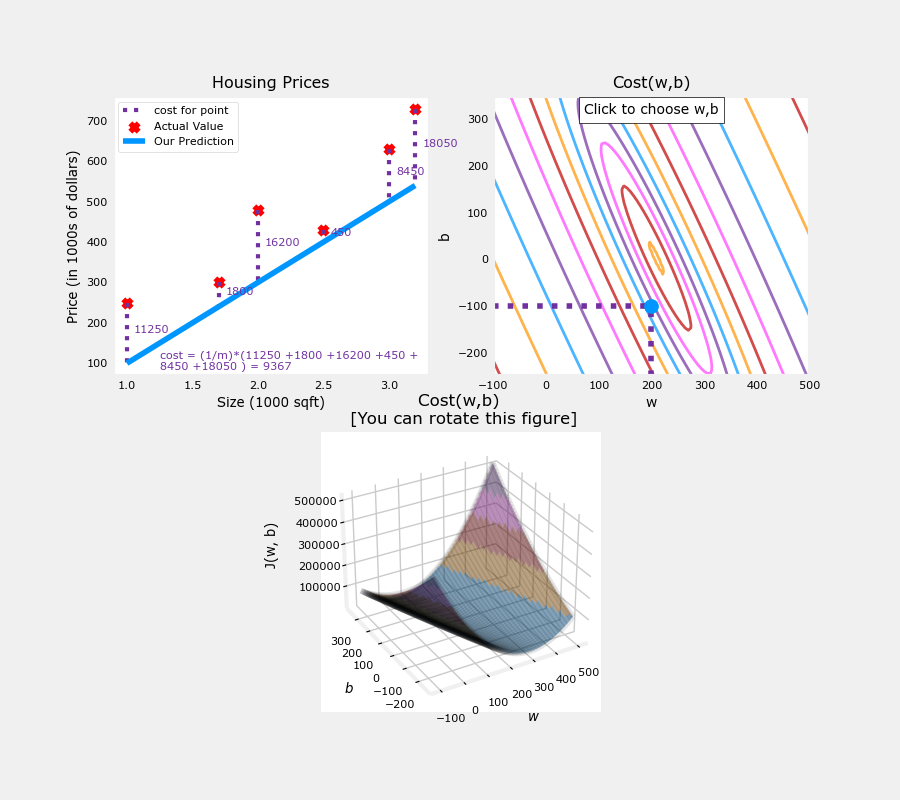

In [52]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

### Gradient Descent

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


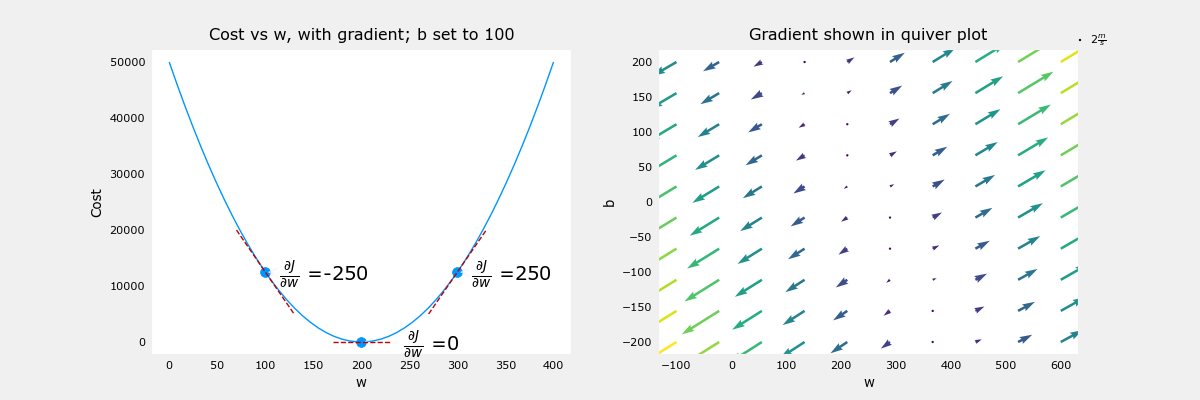

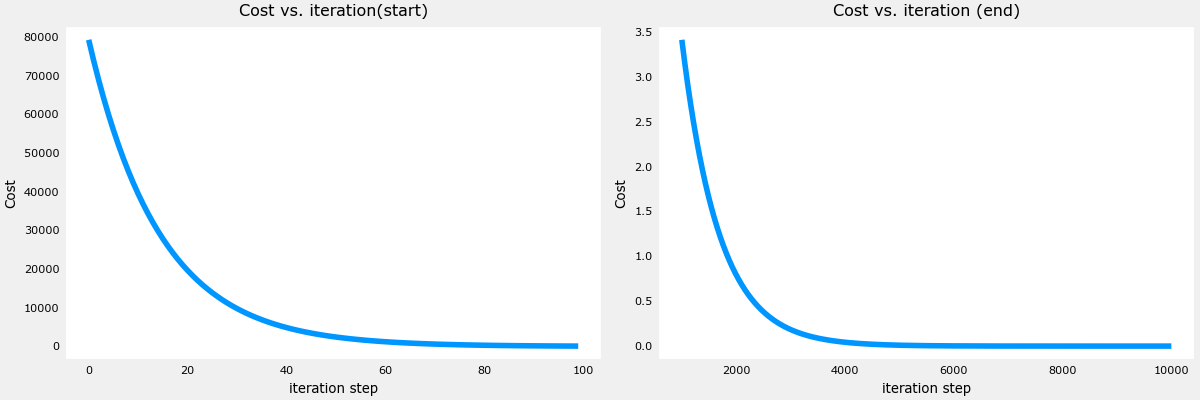

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


In [58]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
%run ./lab_utils_uni.py
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

#plot some partial derivatives of our cost function relative to one of the parameters, w0
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

#predictions
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

#progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b).
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

#zooming
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [59]:
# initialize parameters to show divergence or overshooting the minima when alpha is large
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04
